# Lab 2: Matrix Transformations, Numpy and MatPlotLib
## 1) Setup, data import and projection

### 1a) Setup
1. Import numpy
2. Import matplotlib.pyplot

In [1]:
# Header

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [12,4.5]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### 1b) Projection
1. Read the 3-dimensional toy dataset in 'data/gauss_3d.csv' into a numpy matrix with 3 dimensions (X, Y, and Z). [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html)
2. Create a scatterplot with 3 subplots, one for every possible combination of the dataset's  dimensions. Each of these plots shows a different 2D __projection__ of the 3D dataset. 
  - Remember pyplot? [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) 
  - Remember subplots?  [pyplot.subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) 

(200, 3)


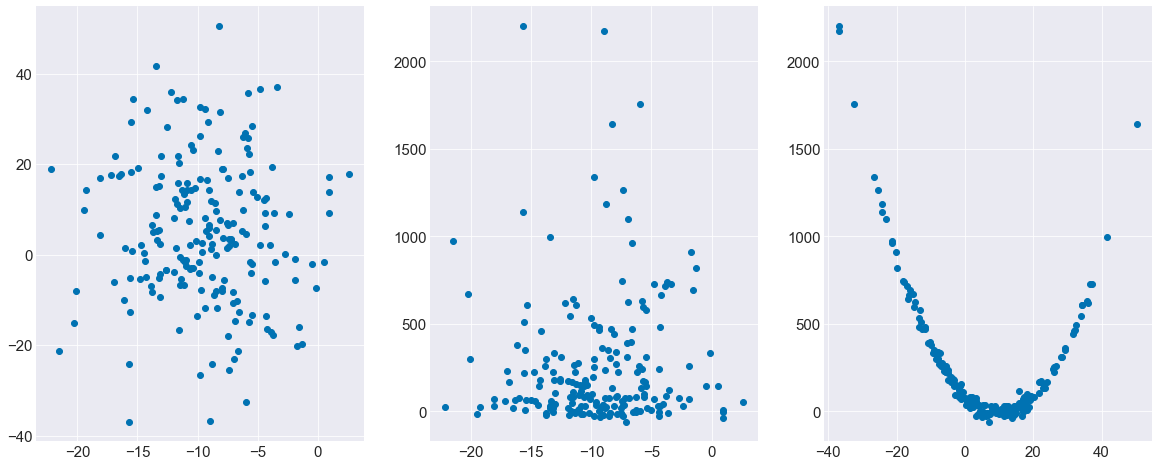

In [28]:
toy = np.genfromtxt('data/gauss_3d.csv', delimiter=',')
print(toy.shape)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,8))

# 1st col (x) vs. 2nd col (y)
ax1.scatter(toy[:,0], toy[:,1])

# 1st col (x) vs. 3rd col (z)
ax2.scatter(toy[:,0], toy[:,2])

# 2nd col (y) vs. 3rd col (z)
ax3.scatter(toy[:,1], toy[:,2])

### 1c) Prepare data for transformation matrices
We need to add a column of 1s to our dataset.
1. Create a matrix of ones of the correct dimensions. [numpy.ones](hhttps://numpy.org/doc/1.18/reference/generated/numpy.ones.html)
2. Add the new column to the imported data. [numpy.hstack](https://numpy.org/doc/1.18/reference/generated/numpy.hstack.html)


In [22]:
col_ones = np.ones([200,1])
toy2 = np.hstack((toy, col_ones))
print(toy2)

[[  -1.878   -1.013   73.627    1.   ]
 [ -13.059   17.36    41.08     1.   ]
 [ -12.641   -3.435  174.669    1.   ]
 [ -15.365   34.323  607.439    1.   ]
 [  -5.673  -14.979  598.393    1.   ]
 [ -21.508  -21.41   973.77     1.   ]
 [  -1.276  -19.761  817.145    1.   ]
 [ -13.806   -8.358  301.274    1.   ]
 [  -8.405  -11.787  470.952    1.   ]
 [ -11.247   34.341  605.098    1.   ]
 [  -2.689    0.103   75.917    1.   ]
 [ -20.301  -15.14   668.435    1.   ]
 [ -11.612   21.716  166.265    1.   ]
 [ -11.92    -3.798  173.865    1.   ]
 [  -4.331  -13.553  479.397    1.   ]
 [ -15.499   18.138    6.781    1.   ]
 [ -10.862   14.35   -15.52     1.   ]
 [ -14.389   -1.524  145.707    1.   ]
 [  -9.789   26.113  252.389    1.   ]
 [  -7.086    6.937  -57.971    1.   ]
 [ -15.503   29.254  350.007    1.   ]
 [  -4.276   12.541   31.791    1.   ]
 [  -5.492   28.382  313.531    1.   ]
 [  -7.488    6.641  -22.467    1.   ]
 [  -5.496  -13.296  579.077    1.   ]
 [ -13.419   41.741  993.

## 2) Scale

<img src="img/Scaling-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that scales the dataset
  - by 3 in the X axis
  - by 0.1 in the Z axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. As 3 subplots, graph the scaled results on all 3 possible pairs of axes alongside the original projections.

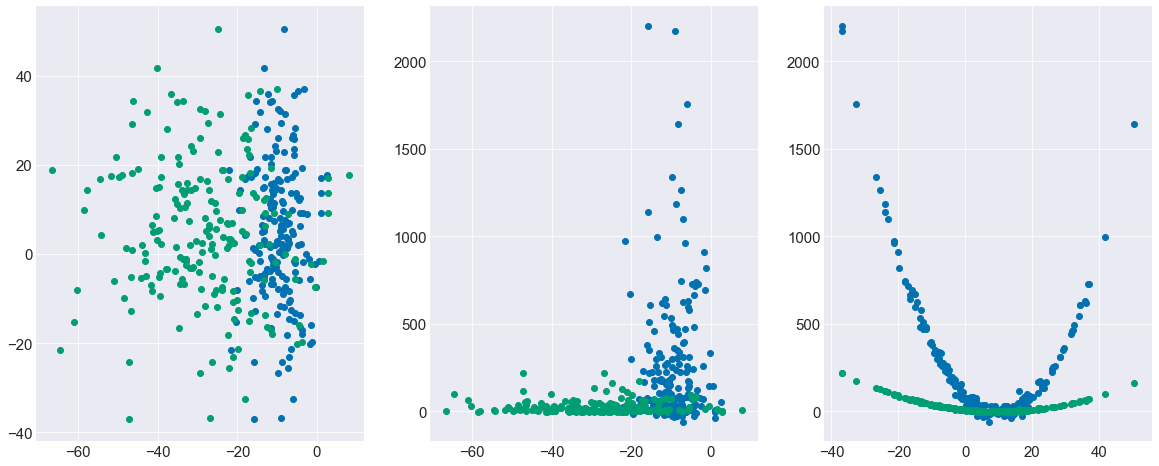

In [30]:
# 1. Transformation matrix that based on an Identity Matrix 
# that scales the dataset by 3 in the X axis, by 0.1 in the Z axis
transformation_matrix = np.eye(4)
transformation_matrix[0,0]=3
transformation_matrix[2,2]=0.1

# 2. Multiply your transformation matrix with the dataset 
# using matrix multiplication and transposed matrices
toy3 = (transformation_matrix @ toy2.T).T
# toy4 = toy2 @ transformation_matrix
# print(toy3)
# print(toy4)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,8))

# 1st col vs. 2nd col
ax1.scatter(toy[:,0], toy[:,1])
ax1.scatter(toy3[:,0], toy3[:,1])

# 1st col vs. 3rd col
ax2.scatter(toy[:,0], toy[:,2])
ax2.scatter(toy3[:,0], toy3[:,2])

# 2nd col vs. 3rd col
ax3.scatter(toy[:,1], toy[:,2])
ax3.scatter(toy3[:,1], toy3[:,2])

## 3) Translation

<img src="img/Translation-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that translates the dataset
  - +25 units in the Y direction  (t<sub>y</sub>)
  - -1000 units in the Z direction (t<sub>z</sub>)
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. As 3 subplots, graph the translated results on all 3 possible pairs of axes alongside the original projections. 
  - <i>You can implement this as a function. You'll be repeating this visualization with different transformation matrices.</i>
  - Each subplot should have a title
  - The plot should include a legend


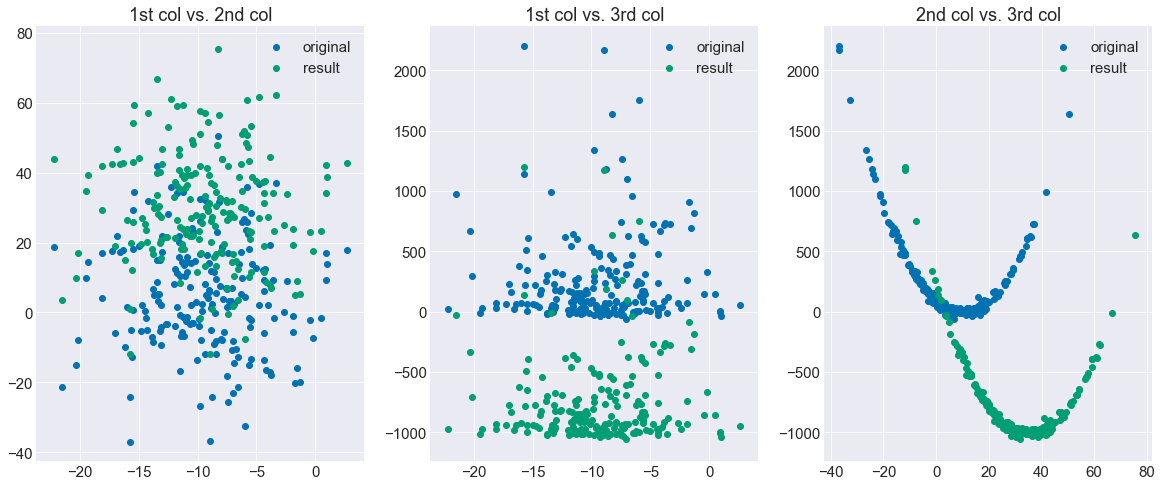

In [39]:
# 1. Design transformation matrix
transformation_matrix2 = np.eye(4)
transformation_matrix2[1,3] = 25
transformation_matrix2[2,3] = -1000
# print(transformation_matrix2)

# 2. Multiply
toy4 = (transformation_matrix2 @ toy2.T).T


def pair_plot(matrix1, matrix2):
    '''As 3 subplots, graph the translated results on all 3 
        possible pairs of axes alongside the original projections.
        
        parameter:
        
        matrix1: ndarray
            original matrix
        
        matrix2: ndarray
            new matrix
    '''
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,8))

    # 1st col vs. 2nd col
    ax1.scatter(matrix1[:,0], matrix1[:,1], label='original')
    ax1.scatter(matrix2[:,0], matrix2[:,1], label='result')
    ax1.set_title('1st col vs. 2nd col')
    ax1.legend()

    # 1st col vs. 3rd col
    ax2.scatter(matrix1[:,0], matrix1[:,2], label='original')
    ax2.scatter(matrix2[:,0], matrix2[:,2], label='result')
    ax2.set_title('1st col vs. 3rd col')
    ax2.legend()

    # 2nd col vs. 3rd col
    ax3.scatter(matrix1[:,1], matrix1[:,2], label='original')
    ax3.scatter(matrix2[:,1], matrix2[:,2], label='result')
    ax3.set_title('2nd col vs. 3rd col')
    ax3.legend()

pair_plot(toy, toy4)

<img src="img/Rotation-Matrix.png" align="right" width="200"/>

## 4) Rotation

1. Design a transformation matrix that rotates the dataset
  - 30 degrees about the Y axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - [Trigonometric functions](https://numpy.org/doc/1.18/reference/routines.math.html)
2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. As 3 subplots, graph the rotated results on all 3 possible pairs of axes alongside the original projections.

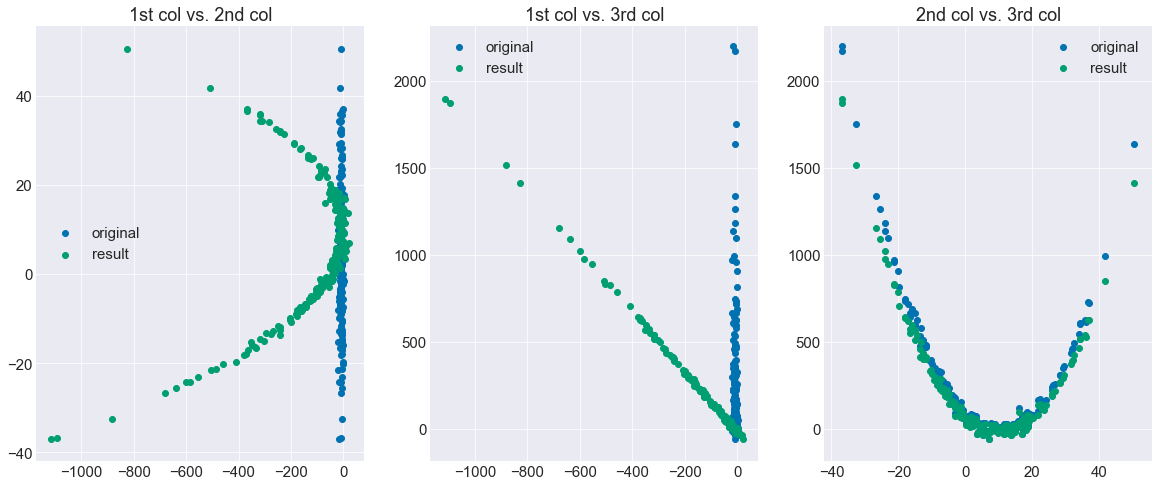

In [41]:
rotation_matrix = np.eye(4)
rotation_matrix[0,0] = np.sqrt(3)/2
rotation_matrix[0,2] = -1/2
rotation_matrix[2,0] = 1/2
rotation_matrix[2,2] = np.sqrt(3)/2

# print(rotation_matrix)

toy5 = (rotation_matrix @ toy2.T).T

pair_plot(toy, toy5)

## 5) Putting it all together
1. Design a transformation matrix that applies all of the transformations in steps 2-4, simultaneously:
  - translates by +25 in Y and -1000 in Z
  - rotates by 30 degrees about Y
  - scales by 3 in X and 0.1 in Z
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. As 3 subplots, graph the scaled results on all 3 possible pairs of axes alongside the original projections.

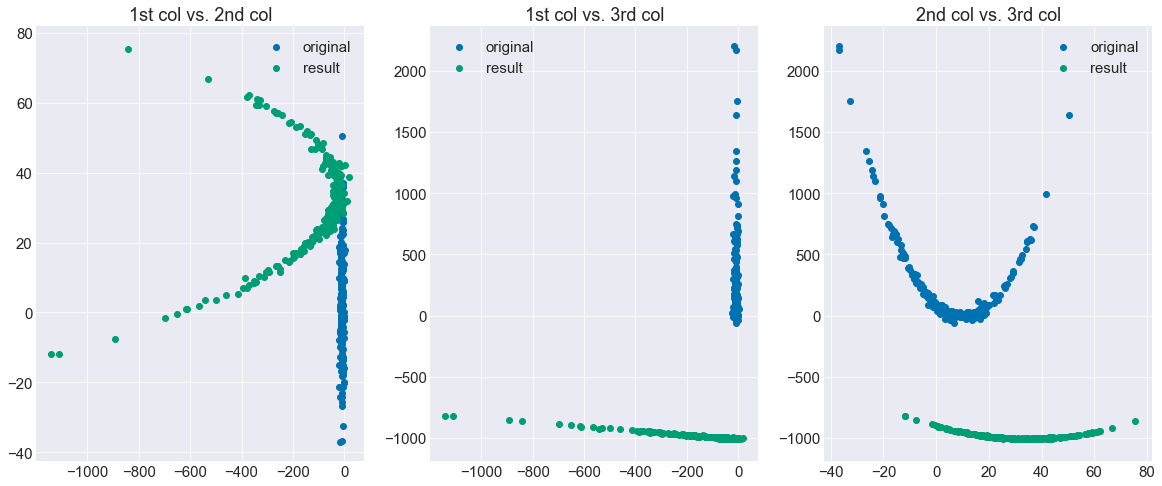

In [43]:
all_matrix = np.eye(4)
all_matrix[1,3] = 25
all_matrix[2,3] = -1000
all_matrix[0,0] = 3*np.sqrt(3)/2
all_matrix[0,2] = -1/2
all_matrix[2,0] = 1/2
all_matrix[2,2] = 0.1*np.sqrt(3)/2

toy6 = (all_matrix @ toy2.T).T

pair_plot(toy, toy6)